## Importar librerias para el proyecto

In [3]:
import os, sys, math, random, datetime, time, json, re, logging, pathlib
import collections, itertools, functools, operator
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sklearn
from flask import Flask
import requests
import unittest, pytest
import dateparser

## Abrir primer documento y hacer una primera revisión

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
ruta1= 'bank-additional.csv'
df1= pd.read_csv(ruta1, index_col=0) # La columna unnamed como indice (index_col=0)
df1.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
5,45.0,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,26-septiembre-2015,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65
6,59.0,admin.,MARRIED,professional.course,0.0,0.0,0.0,telephone,139,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,25-enero-2019,31.456,-94.561,5e3483e5-236d-437d-8351-541f9d09b9dd
7,NaN,blue-collar,MARRIED,NaN,NaN,0.0,0.0,telephone,217,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,25-septiembre-2017,46.871,-122.235,87fdc08b-30ae-4dab-803f-561ecdf27ff0
8,24.0,technician,SINGLE,professional.course,0.0,1.0,0.0,telephone,380,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,18-enero-2018,44.632,-85.811,87b79988-2be5-419d-88f4-56655852c565
9,25.0,services,SINGLE,high.school,0.0,1.0,0.0,telephone,50,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,2-noviembre-2016,30.297,-117.382,ea6b7d04-9271-4c0a-a01f-07795d164aba


Visualizar el tipo de datos de las columnas

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

Comprobar el numero de datos duplicados de la columna id_

In [7]:
df1['id_'].duplicated().sum()

0

Ver el tamaño de df1


In [8]:
df1.shape

(43000, 23)

Ver cuantos casos nulos hay por columnas

In [9]:
df1.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

Modifico el codigo para se vea en %

In [10]:
porcentaje_nulos1 = (df1.isnull().sum() / len(df1)) * 100
porcentaje_nulos1 = porcentaje_nulos1.round(2).astype(str) + ' %'

# Mostrar los porcentajes con dos decimales
print(porcentaje_nulos1.round(2))

age               11.91 %
job                 0.8 %
marital             0.2 %
education           4.2 %
default           20.89 %
housing            2.39 %
loan               2.39 %
contact             0.0 %
duration            0.0 %
campaign            0.0 %
pdays               0.0 %
previous            0.0 %
poutcome            0.0 %
emp.var.rate        0.0 %
cons.price.idx      1.1 %
cons.conf.idx       0.0 %
euribor3m         21.53 %
nr.employed         0.0 %
y                   0.0 %
date               0.58 %
latitude            0.0 %
longitude           0.0 %
id_                 0.0 %
dtype: object


Uso de describe para ver los datos describtivos de las columnas

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
default,34019.0,0.000088,0.009390,0.000,0.00000,0.0000,0.00000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.00000,1.0000,1.00000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.00000,0.0000,0.00000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


## Abrir segundo documento y hacer una primera revisión

In [12]:
ruta2 = 'customer-details.xlsx'
df2 = pd.read_excel(ruta2, index_col=0)
df2.head(10)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
5,143854,0,1,2012-01-24,26,d63ede72-0b6d-45b1-8872-385ac6897f65
6,76439,1,0,2012-08-15,3,5e3483e5-236d-437d-8351-541f9d09b9dd
7,159686,1,1,2012-12-10,21,87fdc08b-30ae-4dab-803f-561ecdf27ff0
8,179933,0,0,2012-08-22,18,87b79988-2be5-419d-88f4-56655852c565
9,77504,1,0,2012-02-09,18,ea6b7d04-9271-4c0a-a01f-07795d164aba


Juntamos codigo para visualizar los datos de df2

In [13]:
print(df2.info())
print('-----------------------------------------------------------')
print(df2.shape)
print('-----------------------------------------------------------')
print(df2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 20115 entries, 0 to 20114
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             20115 non-null  int64         
 1   Kidhome            20115 non-null  int64         
 2   Teenhome           20115 non-null  int64         
 3   Dt_Customer        20115 non-null  datetime64[ns]
 4   NumWebVisitsMonth  20115 non-null  int64         
 5   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB
None
-----------------------------------------------------------
(20115, 6)
-----------------------------------------------------------
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64


In [14]:

porcentaje_nulos2 = (df2.isnull().sum() / len(df2)) * 100
porcentaje_nulos2 = porcentaje_nulos2.round(2).astype(str) + ' %'


print(porcentaje_nulos2)

Income               0.0 %
Kidhome              0.0 %
Teenhome             0.0 %
Dt_Customer          0.0 %
NumWebVisitsMonth    0.0 %
ID                   0.0 %
dtype: object


In [15]:
df2.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')

In [16]:
duplicados_id2 = df2['ID'].duplicated().sum()
print(duplicados_id2)

0


In [17]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Income,20115.0,93087.213224,5852.0,49110.0,92962.0,136705.0,180791.0,50614.798255
Kidhome,20115.0,1.004176,0.0,0.0,1.0,2.0,2.0,0.816811
Teenhome,20115.0,0.999503,0.0,0.0,1.0,2.0,2.0,0.815298
Dt_Customer,20115,2012-07-01 17:15:14.362416128,2012-01-01 00:00:00,2012-04-01 00:00:00,2012-07-02 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,NaN
NumWebVisitsMonth,20115.0,16.54079,1.0,9.0,16.0,25.0,32.0,9.235324


### Cambiamos el nombre de la columna ID para que coincidad con df1

In [18]:
df2.rename(columns={'ID': 'id_'}, inplace=True) 
df2.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'id_'],
      dtype='object')

In [19]:
df_unido = df1.merge(df2, on='id_', how= 'left')
df_unido.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,2012-04-04,29.0
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,2012-12-30,7.0
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,2012-02-02,5.0
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,2012-12-21,29.0
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,2012-06-20,20.0
5,45.0,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,26-septiembre-2015,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65,143854.0,0.0,1.0,2012-01-24,26.0
6,59.0,admin.,MARRIED,professional.course,0.0,0.0,0.0,telephone,139,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,25-enero-2019,31.456,-94.561,5e3483e5-236d-437d-8351-541f9d09b9dd,76439.0,1.0,0.0,2012-08-15,3.0
7,NaN,blue-collar,MARRIED,NaN,NaN,0.0,0.0,telephone,217,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,25-septiembre-2017,46.871,-122.235,87fdc08b-30ae-4dab-803f-561ecdf27ff0,159686.0,1.0,1.0,2012-12-10,21.0
8,24.0,technician,SINGLE,professional.course,0.0,1.0,0.0,telephone,380,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,18-enero-2018,44.632,-85.811,87b79988-2be5-419d-88f4-56655852c565,179933.0,0.0,0.0,2012-08-22,18.0
9,25.0,services,SINGLE,high.school,0.0,1.0,0.0,telephone,50,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,2-noviembre-2016,30.297,-117.382,ea6b7d04-9271-4c0a-a01f-07795d164aba,77504.0,1.0,0.0,2012-02-09,18.0


Comprobar el tamaño de df_unido

In [20]:
df_unido.shape

(43000, 28)

In [21]:
df_unido.isnull().sum()

age                   5120
job                    345
marital                 85
education             1807
default               8981
housing               1026
loan                  1026
contact                  0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
emp.var.rate             0
cons.price.idx         471
cons.conf.idx            0
euribor3m             9256
nr.employed              0
y                        0
date                   248
latitude                 0
longitude                0
id_                      0
Income               22982
Kidhome              22982
Teenhome             22982
Dt_Customer          22982
NumWebVisitsMonth    22982
dtype: int64

Ver cuantos casos unicos hay en cada columna

In [22]:
porcentaje_nulos_u = (df_unido.isnull().sum() / len(df_unido)) * 100
porcentaje_nulos_u = porcentaje_nulos_u.round(2).astype(str) + ' %'

# Mostrar los porcentajes con dos decimales
print(porcentaje_nulos_u)

age                  11.91 %
job                    0.8 %
marital                0.2 %
education              4.2 %
default              20.89 %
housing               2.39 %
loan                  2.39 %
contact                0.0 %
duration               0.0 %
campaign               0.0 %
pdays                  0.0 %
previous               0.0 %
poutcome               0.0 %
emp.var.rate           0.0 %
cons.price.idx         1.1 %
cons.conf.idx          0.0 %
euribor3m            21.53 %
nr.employed            0.0 %
y                      0.0 %
date                  0.58 %
latitude               0.0 %
longitude              0.0 %
id_                    0.0 %
Income               53.45 %
Kidhome              53.45 %
Teenhome             53.45 %
Dt_Customer          53.45 %
NumWebVisitsMonth    53.45 %
dtype: object


In [23]:
df_unido.nunique()

age                     78
job                     11
marital                  3
education                7
default                  2
housing                  2
loan                     2
contact                  2
duration              1540
campaign                42
pdays                   27
previous                 8
poutcome                 3
emp.var.rate            10
cons.price.idx          26
cons.conf.idx           26
euribor3m              309
nr.employed             11
y                        2
date                  1825
latitude             20491
longitude            30448
id_                  43000
Income               18922
Kidhome                  3
Teenhome                 3
Dt_Customer            366
NumWebVisitsMonth       32
dtype: int64

imprimir los casos unicos que son mas relevantes para luego poder filtrar o agrupar por ellos


In [24]:
print(df_unido['job'].unique())
print('-------------------------------------------------------------------')
print(df_unido['marital'].unique())
print('-------------------------------------------------------------------')
print(df_unido['education'].unique())
print('-------------------------------------------------------------------')
print(df_unido['contact'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
-------------------------------------------------------------------
['MARRIED' 'SINGLE' 'DIVORCED' nan]
-------------------------------------------------------------------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
-------------------------------------------------------------------
['telephone' 'cellular']


Crear una nueva columna nueva sumando niños y adolescentes

In [25]:
hijos = df_unido['Kidhome'] + df_unido['Teenhome']
df_unido['Sonhome'] = hijos 

In [26]:
df_unido.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Sonhome
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,2012-04-04,29.0,1.0
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,2012-12-30,7.0,2.0
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,2012-02-02,5.0,2.0
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,2012-12-21,29.0,3.0
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,2012-06-20,20.0,3.0


Crear un grafico con sns para ver como se distribuyn los hijos en los difetentes estados civivles


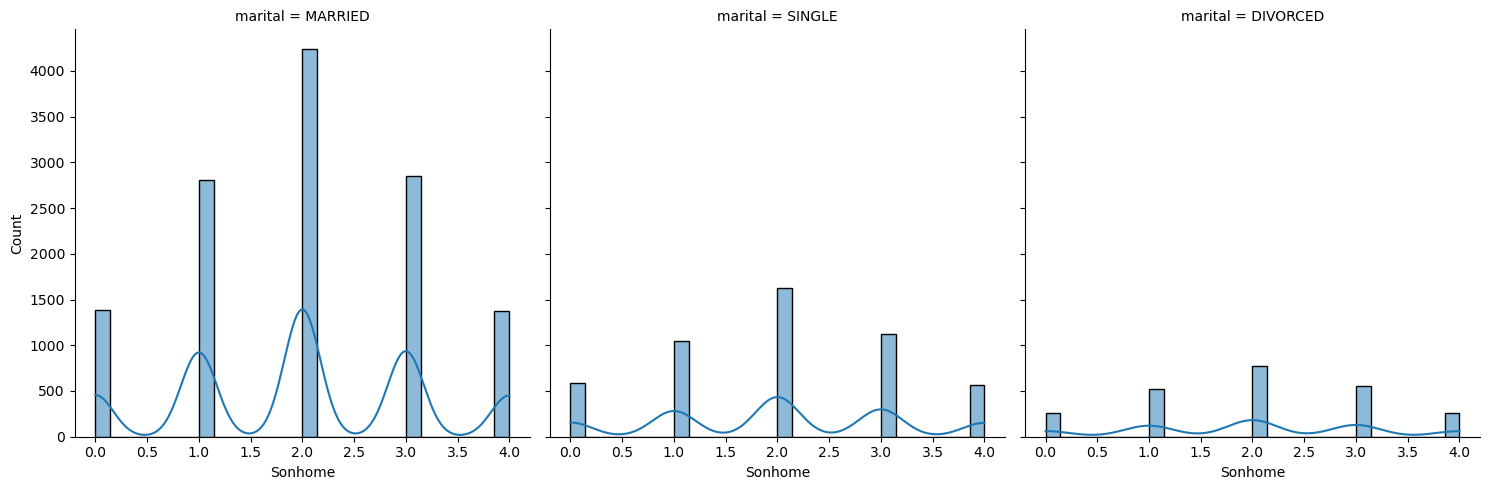

In [27]:

sns.displot(data= df_unido, x='Sonhome', col="marital", kde= True);

Grafico para ver como se distribuye la educaciín en los casos de estados civiles

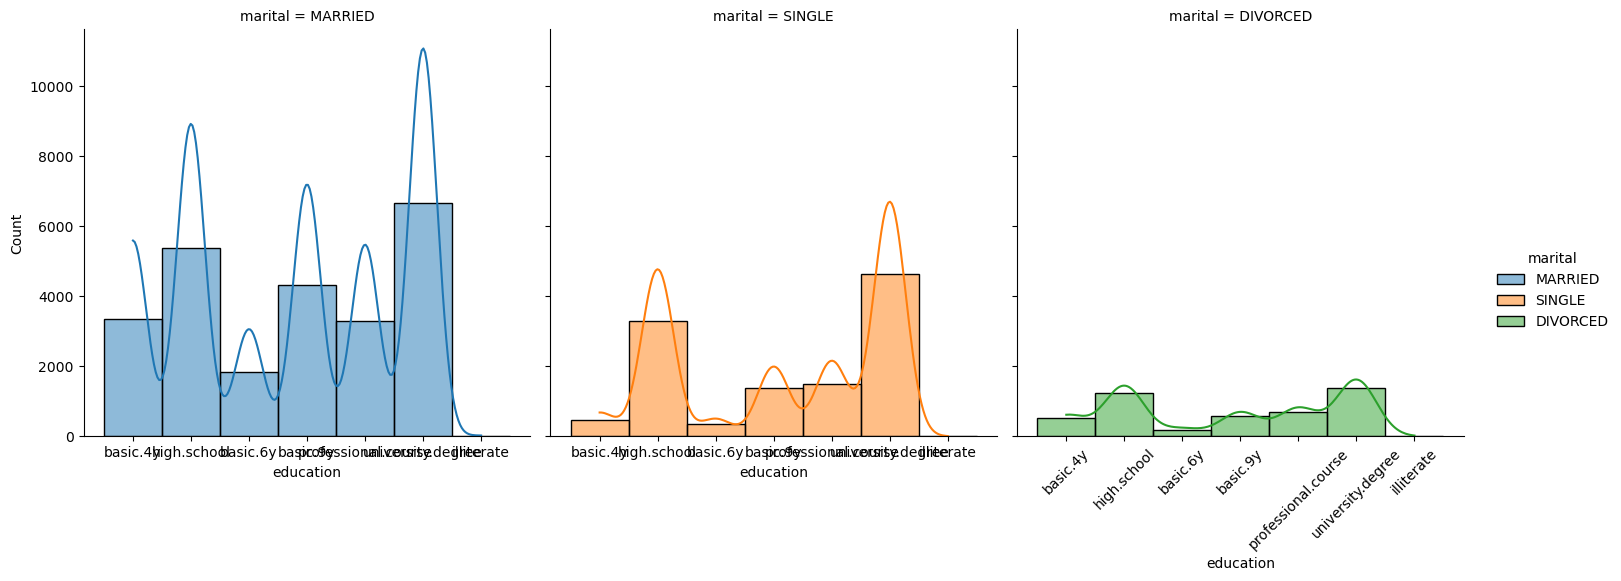

In [28]:
sns.displot(data= df_unido, x='education', col="marital",hue="marital" ,kde= True)
plt.xticks(rotation=45)
plt.show();

Creo un funcion for para que las etiquetas de las columnas x se vean mejor

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17232\2338168003.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17232\2338168003.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17232\2338168003.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


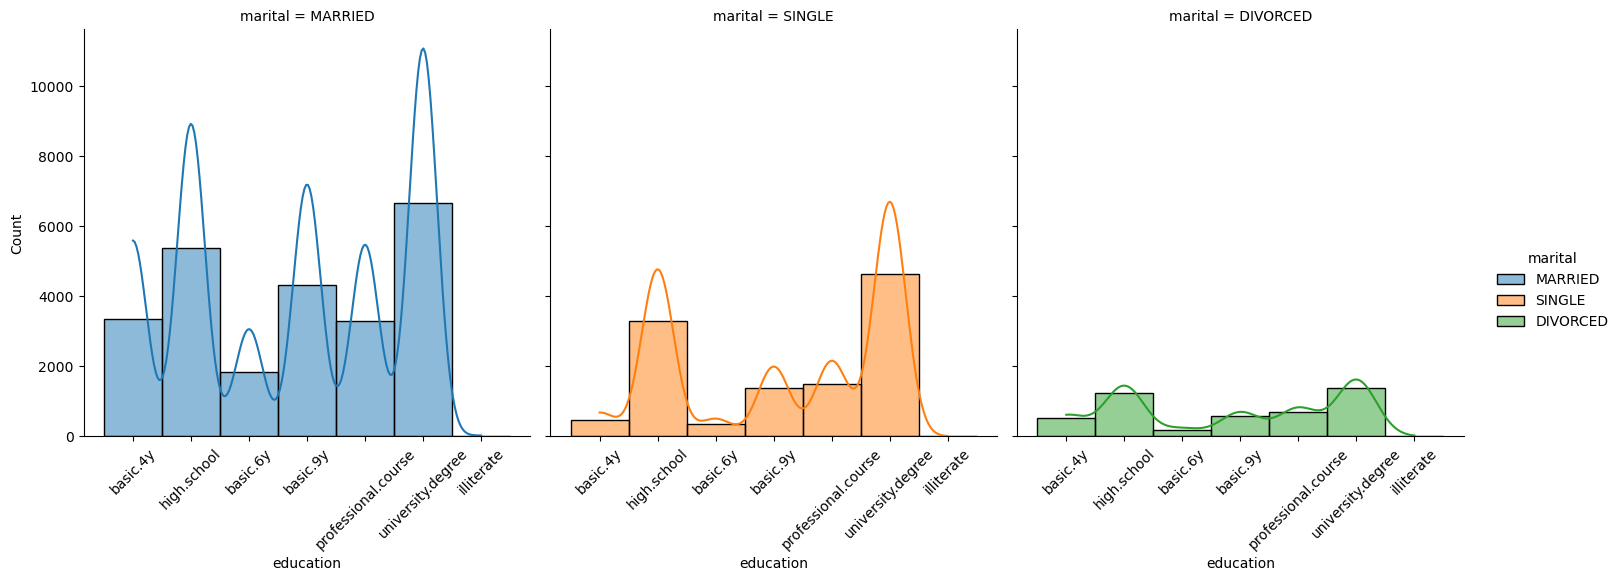

In [29]:
g = sns.displot(data=df_unido, x='education', col="marital", hue="marital", kde=True)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Comprobar como se distrubuye la edad en los estados civiles

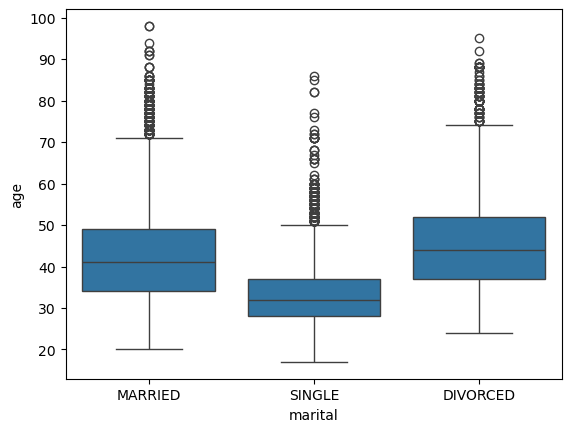

In [30]:
sns.boxplot(data= df_unido, x='marital', y="age");

In [31]:
df_unido.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'Sonhome'],
      dtype='object')

In [32]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp.var.rate       43000 non-null  float64       
 14  cons.p

In [33]:
df_unido.isnull().sum()

age                   5120
job                    345
marital                 85
education             1807
default               8981
housing               1026
loan                  1026
contact                  0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
emp.var.rate             0
cons.price.idx         471
cons.conf.idx            0
euribor3m             9256
nr.employed              0
y                        0
date                   248
latitude                 0
longitude                0
id_                      0
Income               22982
Kidhome              22982
Teenhome             22982
Dt_Customer          22982
NumWebVisitsMonth    22982
Sonhome              22982
dtype: int64

In [34]:
porcentaje_nulos_u = (df_unido.isnull().sum() / len(df_unido)) * 100
porcentaje_nulos_u = porcentaje_nulos_u.round(2).astype(str) + ' %'
print(porcentaje_nulos_u)


age                  11.91 %
job                    0.8 %
marital                0.2 %
education              4.2 %
default              20.89 %
housing               2.39 %
loan                  2.39 %
contact                0.0 %
duration               0.0 %
campaign               0.0 %
pdays                  0.0 %
previous               0.0 %
poutcome               0.0 %
emp.var.rate           0.0 %
cons.price.idx         1.1 %
cons.conf.idx          0.0 %
euribor3m            21.53 %
nr.employed            0.0 %
y                      0.0 %
date                  0.58 %
latitude               0.0 %
longitude              0.0 %
id_                    0.0 %
Income               53.45 %
Kidhome              53.45 %
Teenhome             53.45 %
Dt_Customer          53.45 %
NumWebVisitsMonth    53.45 %
Sonhome              53.45 %
dtype: object


In [35]:
print(df_unido['age'].head(20))

0      NaN
1     57.0
2     37.0
3     40.0
4     56.0
5     45.0
6     59.0
7      NaN
8     24.0
9     25.0
10    41.0
11    25.0
12    29.0
13    57.0
14    35.0
15    54.0
16    35.0
17     NaN
18    50.0
19    39.0
Name: age, dtype: float64


marital
DIVORCED    44.965712
MARRIED     42.244398
SINGLE      33.104863
Name: age, dtype: float64


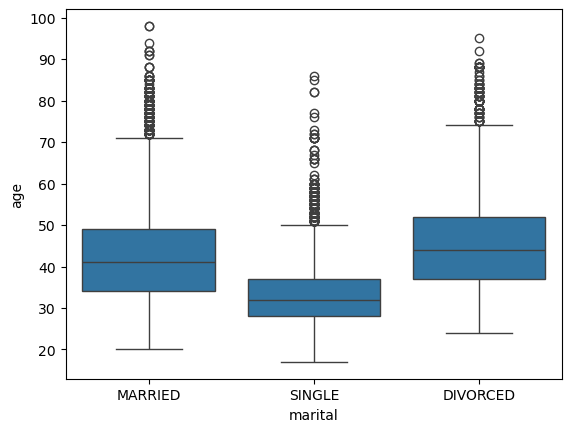

In [36]:
sns.boxplot(data=df_unido, x='marital', y='age')

# Calcular la media por grupo
medias = df_unido.groupby('marital')['age'].mean()

print(medias)

In [37]:
df_unido['age'] = df_unido['age'].fillna(df_unido.groupby('marital')['age'].transform('mean'))

In [38]:
df_unido['age'] = round(df_unido['age'],2)

In [39]:
df_unido.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Sonhome
0,42.24,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,2012-04-04,29.0,1.0
1,57.00,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,2012-12-30,7.0,2.0
2,37.00,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,2012-02-02,5.0,2.0
3,40.00,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,2012-12-21,29.0,3.0
4,56.00,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,2012-06-20,20.0,3.0


In [40]:
df_unido.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'Sonhome'],
      dtype='object')

In [41]:
print(df_unido['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']


In [42]:
def clasificar_trabajo(job):
    if job in ['admin.', 'technician', 'blue-collar', 'services', 'management', 'housemaid', 'self-employed', 'entrepreneur']:
        return 'employed'
    elif job == 'unemployed':
        return 'unemployed'
    elif job == 'retired':
        return 'retired'
    elif job == 'student':
        return 'student'
    else:
        return 'other'  # O puedes usar 'desconocido' si prefieres

# Crear la nueva columna
df_unido['empl_stat'] = df_unido['job'].apply(clasificar_trabajo)

In [43]:
minutos = df_unido['duration'] / 60
df_unido['duration_min'] = minutos.round(2)

In [44]:
df_unido['marital']  =df_unido['marital'].str.lower()

In [45]:
df_unido['poutcome']  =df_unido['poutcome'].str.lower()

In [46]:
print(df_unido['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']


Pido los casos unicos de **educación** para poder crear una columna agruupandolos

In [47]:
print(df_unido['education'].unique())

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']


In [48]:
def clasificar_estudios(education):
    if education in ['basic.4y','high.school', 'basic.6y', 'basic.9y']:
        return 'school'
    elif education == 'university.degree':
        return 'degree'
    elif education == 'professional.course':
        return 'professional.course'
    elif education == 'illiterate':
        return 'non.studies'
    elif education == 'professional.course':
        return 'professional'
    else:
        return 'other'  # O puedes usar 'desconocido' si prefieres

# Crear la nueva columna
df_unido['educa_level'] = df_unido['education'].apply(clasificar_estudios)

Pongo los datos de cifras en un formato que se pueda analizar

In [49]:
df_unido['Dt_Customer'] = pd.to_datetime(df_unido['Dt_Customer']).dt.strftime('%d/%m/%Y')

In [50]:
df_unido.isnull().sum()

age                      8
job                    345
marital                 85
education             1807
default               8981
housing               1026
loan                  1026
contact                  0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
emp.var.rate             0
cons.price.idx         471
cons.conf.idx            0
euribor3m             9256
nr.employed              0
y                        0
date                   248
latitude                 0
longitude                0
id_                      0
Income               22982
Kidhome              22982
Teenhome             22982
Dt_Customer          22982
NumWebVisitsMonth    22982
Sonhome              22982
empl_stat                0
duration_min             0
educa_level              0
dtype: int64

Grafico para comprobar como se dsitrubye el sueldo para los diferentes niveles de estudio

educa_level
degree                 92419.0
non.studies            83147.0
other                  91435.0
professional.course    93637.0
school                 93350.0
Name: Income, dtype: float64


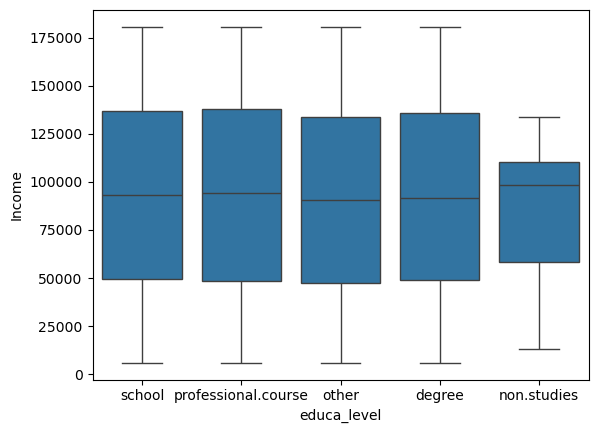

In [51]:
sns.boxplot(data=df_unido, x='educa_level', y='Income')

# Calcular la media por grupo
medias_ingresos_educacion = df_unido.groupby('educa_level')['Income'].mean().round()

print(medias_ingresos_educacion)

El % porcentaje de casos hay en los niveles de estudio

In [52]:
porc_estudios = df_unido['educa_level'].value_counts(normalize=True) * 100
porc_estudios = porc_estudios.round(2).astype(str) + ' %'
print(porc_estudios)

educa_level
school                 53.43 %
degree                 29.59 %
professional.course    12.74 %
other                    4.2 %
non.studies             0.04 %
Name: proportion, dtype: object


El % porcentaje de casos hay en los diferentes estados civiles

In [53]:
porc_estado_civil = df_unido['marital'].value_counts(normalize=True) * 100
porc_estado_civil = porc_estado_civil.round(2).astype(str) + ' %'
print(porc_estado_civil)

marital
married     60.58 %
single      28.21 %
divorced    11.21 %
Name: proportion, dtype: object


El % porcentaje de casos hay en los diferentes estados laborales agrupados

In [54]:
porc_estado_empleo = df_unido['empl_stat'].value_counts(normalize=True) * 100
porc_estado_empleo = porc_estado_empleo.round(2).astype(str) + ' %'
print(porc_estado_empleo)

empl_stat
employed      90.46 %
retired        4.16 %
unemployed     2.47 %
student         2.1 %
other           0.8 %
Name: proportion, dtype: object


Comprobar si hay diferencias de tiempo entre los diferentes tipo de contacto

contact
cellular     4.38
telephone    4.15
Name: duration_min, dtype: float64


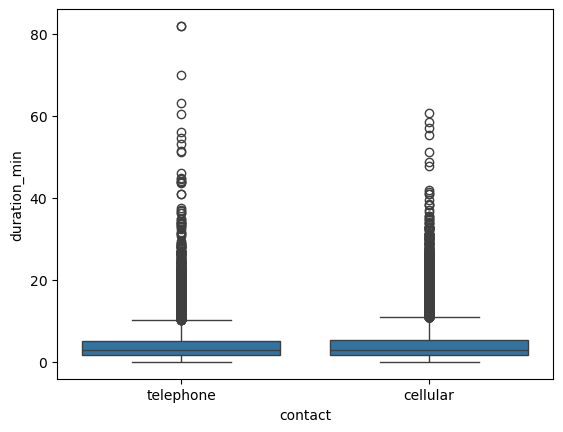

In [55]:
sns.boxplot(data=df_unido, x='contact', y='duration_min')

# Calcular la media por grupo
medias_minutos_call = df_unido.groupby('contact')['duration_min'].mean().round(2)

print(medias_minutos_call)

Analisis de la duración de las llamadas por los empleados

In [56]:
df_unido['nr.employed'].unique()

array(['5191', '5228,1', '5195,8', '5176,3', '5099,1', '5076,2', '5017,5',
       '5023,5', '5008,7', '4991,6', '4963,6'], dtype=object)

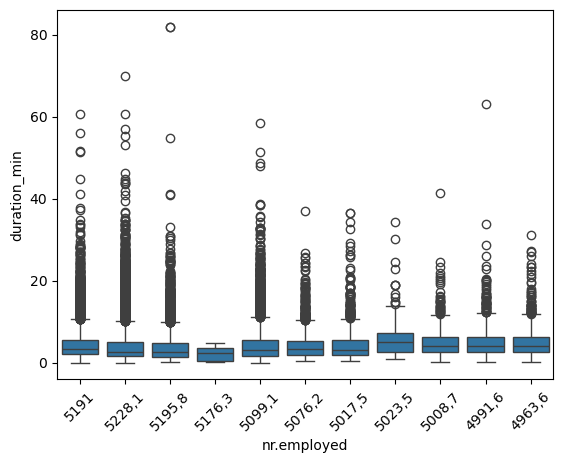

nr.employed
4963,6    5.12
4991,6    5.03
5008,7    5.05
5017,5    4.55
5023,5    6.08
5076,2    4.22
5099,1    4.38
5176,3    2.27
5191      4.40
5195,8    4.00
5228,1    4.14
Name: duration_min, dtype: float64


In [57]:
sns.boxplot(data=df_unido, x='nr.employed', y='duration_min')
plt.xticks(rotation=45)
plt.show()

# Calcular la media por grupo
medias_emplo_call = df_unido.groupby('nr.employed')['duration_min'].mean().round(2)

print(medias_emplo_call)

In [58]:
df_unido.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Sonhome,empl_stat,duration_min,educa_level
0,42.24,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,04/04/2012,29.0,1.0,employed,4.35,school
1,57.00,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,30/12/2012,7.0,2.0,employed,2.48,school
2,37.00,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,02/02/2012,5.0,2.0,employed,3.77,school
3,40.00,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,21/12/2012,29.0,3.0,employed,2.52,school
4,56.00,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,20/06/2012,20.0,3.0,employed,5.12,school


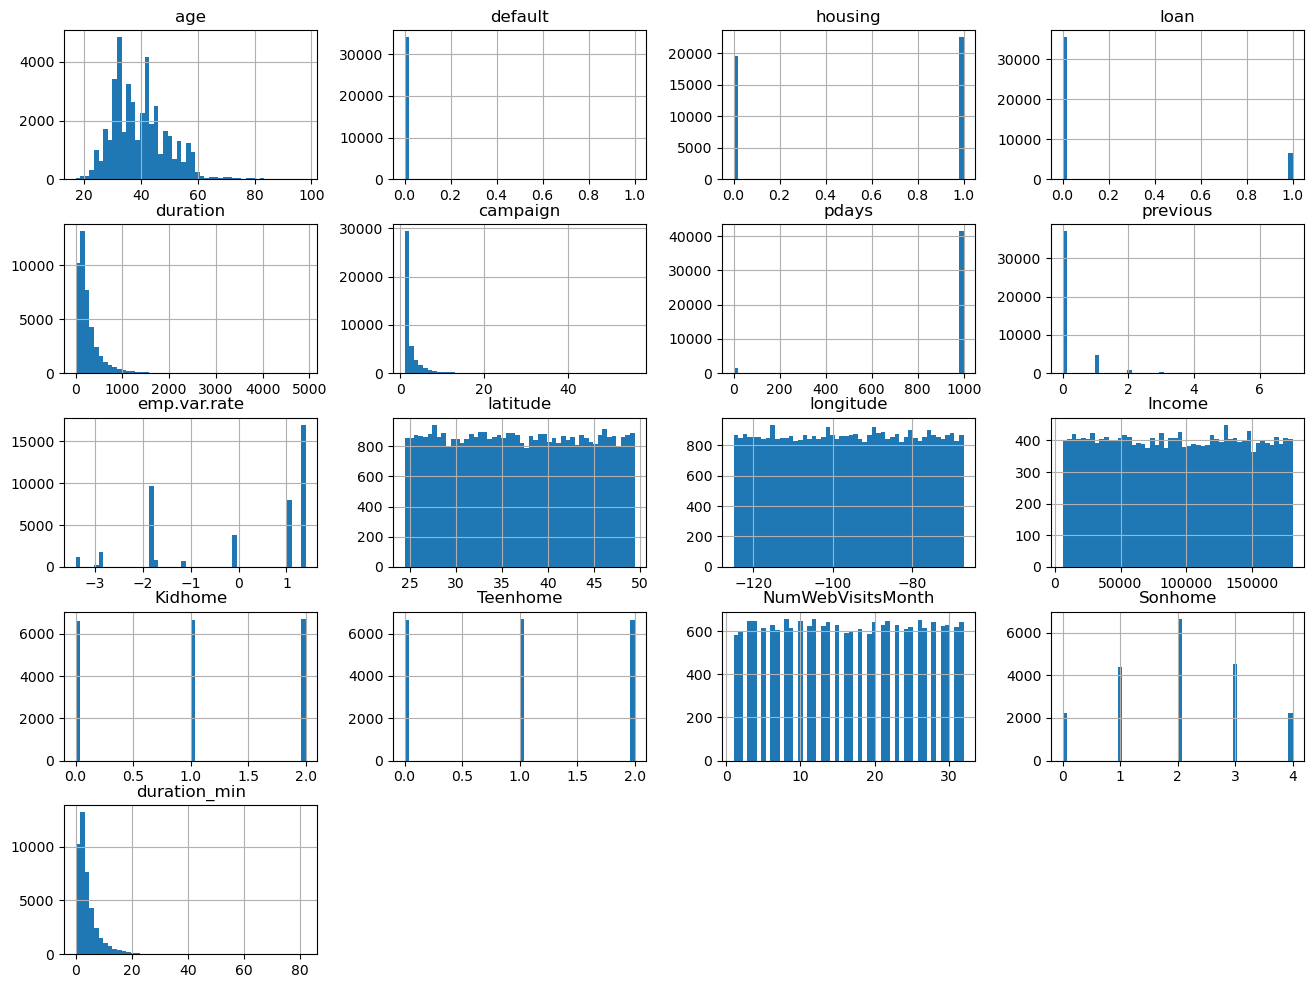

In [59]:
df_unido.hist(bins=50, figsize=(16,12))
plt.show()

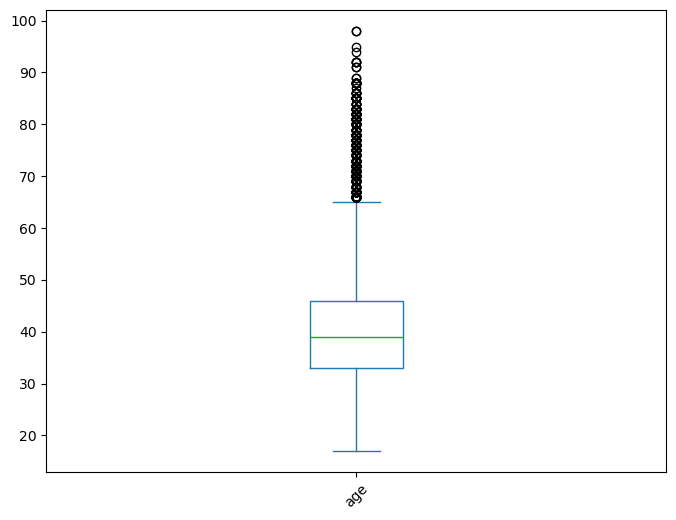

In [60]:
df_unido[['age']].plot(kind="box", figsize=(8,6))
plt.xticks(rotation=45)
plt.show()


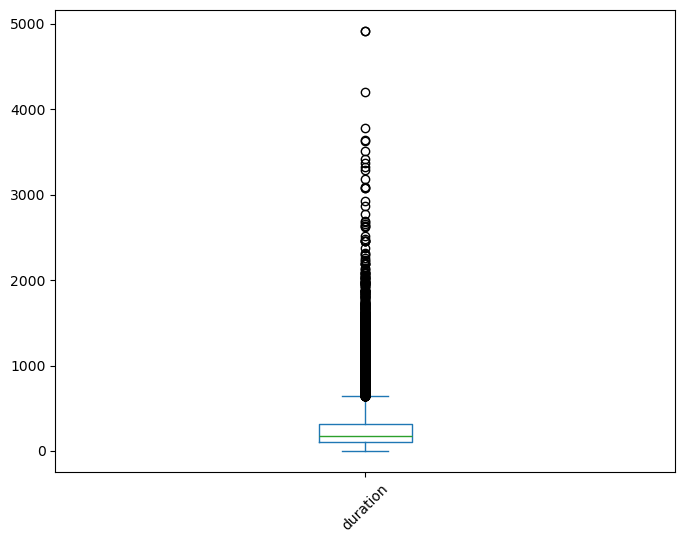

In [61]:
df_unido[['duration']].plot(kind="box", figsize=(8,6))
plt.xticks(rotation=45)
plt.show()

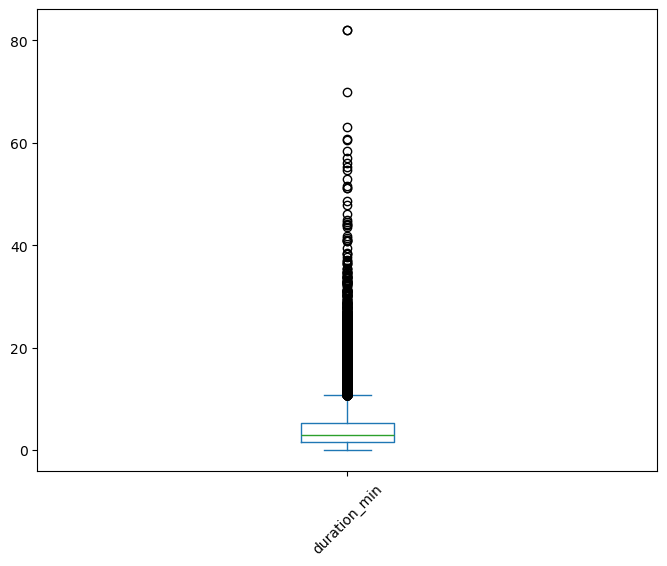

In [62]:
df_unido[['duration_min']].plot(kind="box", figsize=(8,6))
plt.xticks(rotation=45)
plt.show()

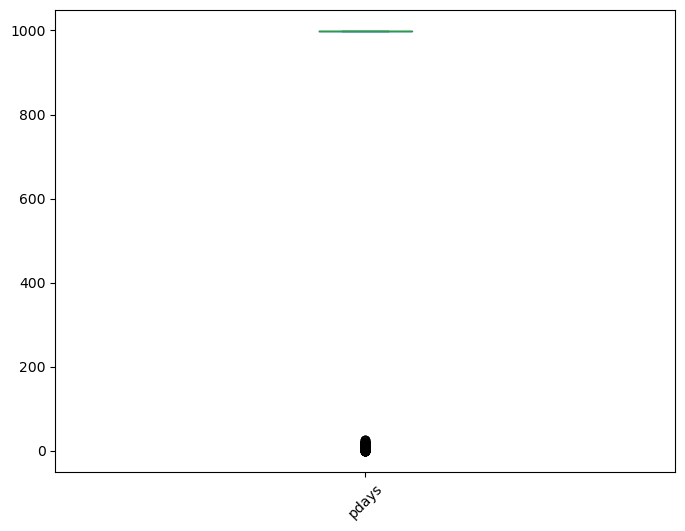

In [63]:
df_unido[['pdays']].plot(kind="box", figsize=(8,6))
plt.xticks(rotation=45)
plt.show()

In [64]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                42992 non-null  float64
 1   job                42655 non-null  object 
 2   marital            42915 non-null  object 
 3   education          41193 non-null  object 
 4   default            34019 non-null  float64
 5   housing            41974 non-null  float64
 6   loan               41974 non-null  float64
 7   contact            43000 non-null  object 
 8   duration           43000 non-null  int64  
 9   campaign           43000 non-null  int64  
 10  pdays              43000 non-null  int64  
 11  previous           43000 non-null  int64  
 12  poutcome           43000 non-null  object 
 13  emp.var.rate       43000 non-null  float64
 14  cons.price.idx     42529 non-null  object 
 15  cons.conf.idx      43000 non-null  object 
 16  euribor3m          337

In [65]:
df_unido.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Sonhome,empl_stat,duration_min,educa_level
0,42.24,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,04/04/2012,29.0,1.0,employed,4.35,school
1,57.00,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,30/12/2012,7.0,2.0,employed,2.48,school
2,37.00,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,02/02/2012,5.0,2.0,employed,3.77,school
3,40.00,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,21/12/2012,29.0,3.0,employed,2.52,school
4,56.00,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,20/06/2012,20.0,3.0,employed,5.12,school


Creo un grafico con titulo

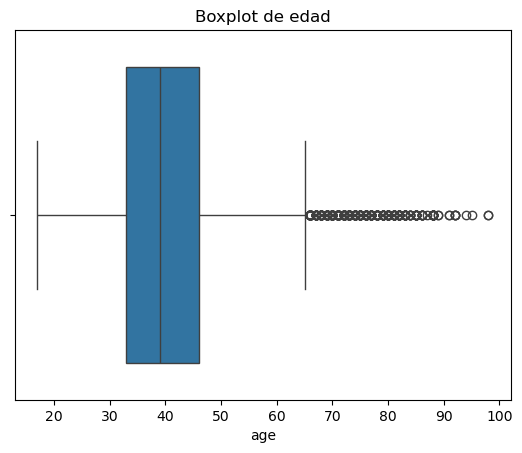

In [66]:
sns.boxplot(x=df_unido['age'])
plt.title('Boxplot de edad')
plt.show()

Creo una copia para comprobar si elimando los outliers seria bueno los siguientes analisis pero se reduce mucho las filas

In [67]:
df_unido_c  = df_unido.copy()

In [68]:
df_unido_c.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Sonhome,empl_stat,duration_min,educa_level
0,42.24,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,161770.0,1.0,0.0,04/04/2012,29.0,1.0,employed,4.35,school
1,57.00,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,85477.0,1.0,1.0,30/12/2012,7.0,2.0,employed,2.48,school
2,37.00,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233.0,1.0,1.0,02/02/2012,5.0,2.0,employed,3.77,school
3,40.00,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,121393.0,1.0,2.0,21/12/2012,29.0,3.0,employed,2.52,school
4,56.00,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164.0,1.0,2.0,20/06/2012,20.0,3.0,employed,5.12,school


# Realizo la limpieza de datos outliers pero no continuo con ello por el hecho de que elimina un porcentaje muy grande

In [69]:

#Q1 = df_unido['age'].quantile(0.25)
#Q3 = df_unido['age'].quantile(0.75)
##IQR = Q3 - Q1


#lim_inf = Q1 - 1.5 * IQR
#lim_sup = Q3 + 1.5 * IQR


#outliers_age = df_unido[(df_unido['age'] < lim_inf) | (df_unido['age'] > lim_sup)]


#print(outliers_age[['age']])


#print(f"Número de outliers en 'age': {outliers_age.shape[0]}")

In [70]:
# df_unido_c  = df_unido.copy()

In [71]:
# numericas = ['age' ]

# def eliminar_atipicos(df_unido, columnas=numericas):

    #df_sin_atipicos = df_unido.copy()

    #for columna in columnas:
        #Q1 = df_unido_c[columna].quantile(0.25)
        #Q3 = df_unido_c[columna].quantile(0.75)
        #IQR = Q3 -Q1
        #limite_inferior = Q1 - 1.5 * IQR
        #limite_superior = Q1 + 1.5 * IQR

        #df_sin_atipicos = df_sin_atipicos[
         #   (df_sin_atipicos[columna] >= limite_inferior) &
          #  (df_sin_atipicos[columna] >= limite_superior) 
     #   ]   
    #return df_sin_atipicos

#for i in range(2):
 #   df_no_atip  = eliminar_atipicos(df_unido_c, numericas)
  #  print(i,df_no_atip.shape)

contact
cellular     4.38
telephone    4.15
Name: duration_min, dtype: float64


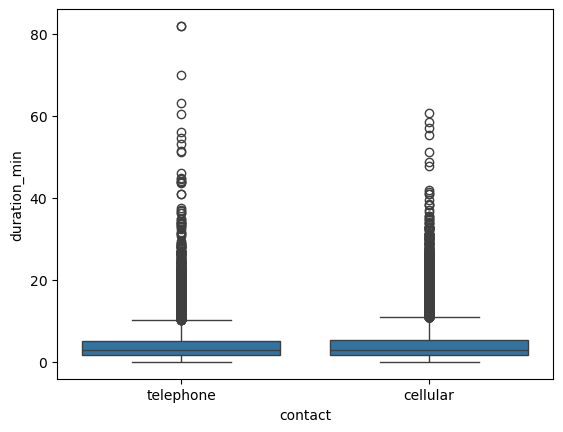

In [72]:
sns.boxplot(data=df_unido, x='contact', y='duration_min')

# Calcular la media por grupo
medias_minutos_call = df_unido.groupby('contact')['duration_min'].mean().round(2)

print(medias_minutos_call)

contact
cellular     4.38
telephone    4.15
Name: duration_min, dtype: float64


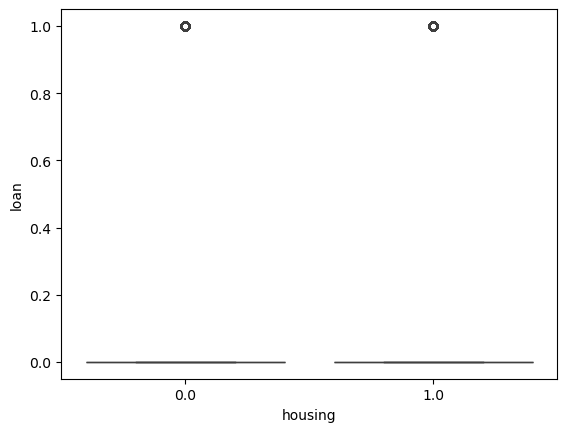

In [73]:
sns.boxplot(data=df_unido_c, x='housing', y='loan')

# Calcular la media por grupo
hipo_mas_prestamos= df_unido.groupby('housing')['loan'].sum()

print(medias_minutos_call)

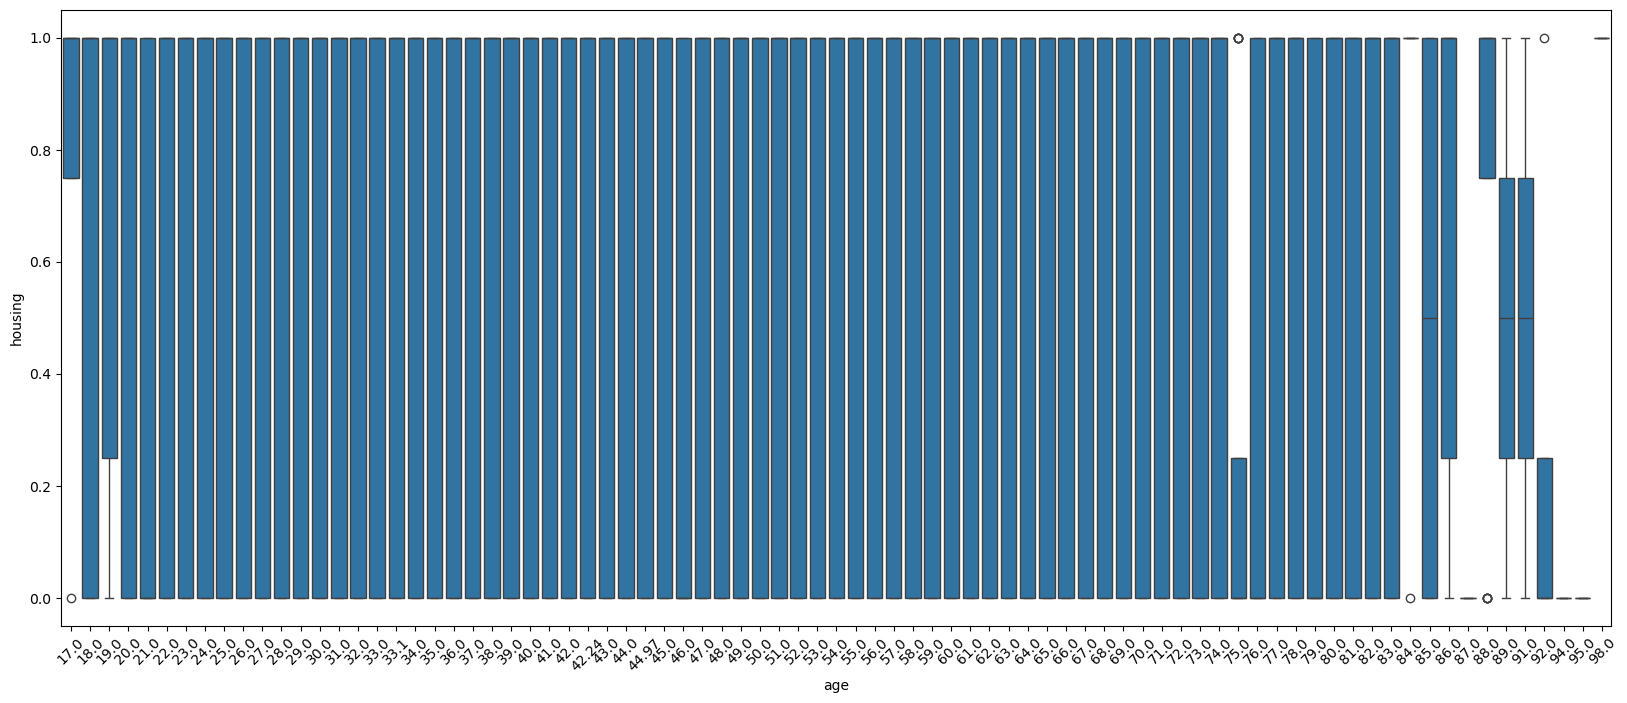

contact
cellular     4.38
telephone    4.15
Name: duration_min, dtype: float64


In [74]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_unido_c, x='age', y='housing')
plt.xticks(rotation=45)
plt.show()

# Calcular la media por grupo
medias_edad_hipo = df_unido.groupby('age')['housing'].sum()

print(medias_minutos_call)

age
17.0     1.0
18.0     4.0
19.0     7.0
20.0    10.0
21.0    11.0
        ... 
91.0     2.0
92.0     2.0
94.0     0.0
95.0     0.0
98.0     0.0
Name: loan, Length: 81, dtype: float64


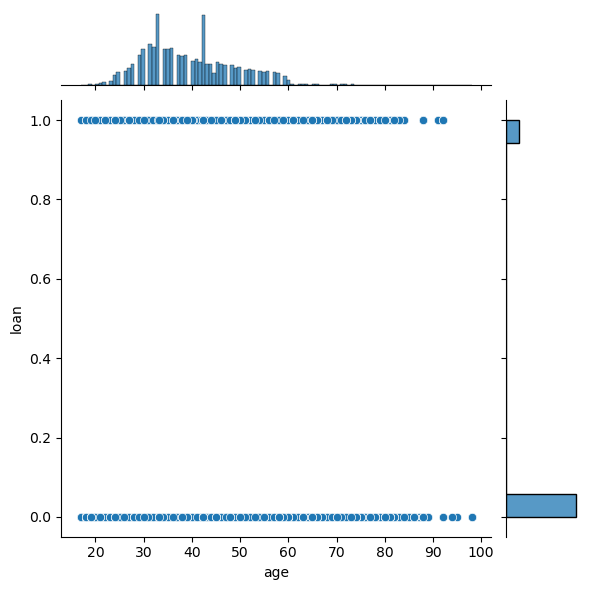

In [75]:

sns.jointplot(data=df_unido_c, x='age', y='loan')

# Calcular la media por grupo
medias_edad_mas_hipo = df_unido.groupby('age')['loan'].sum()

print(medias_edad_mas_hipo)

Visualizo en que edades on los que piden un segundo prestamo


age
17.0     1.0
18.0     4.0
19.0     7.0
20.0    10.0
21.0    11.0
        ... 
83.0     5.0
84.0     2.0
88.0     3.0
91.0     2.0
92.0     2.0
Name: loan, Length: 74, dtype: float64


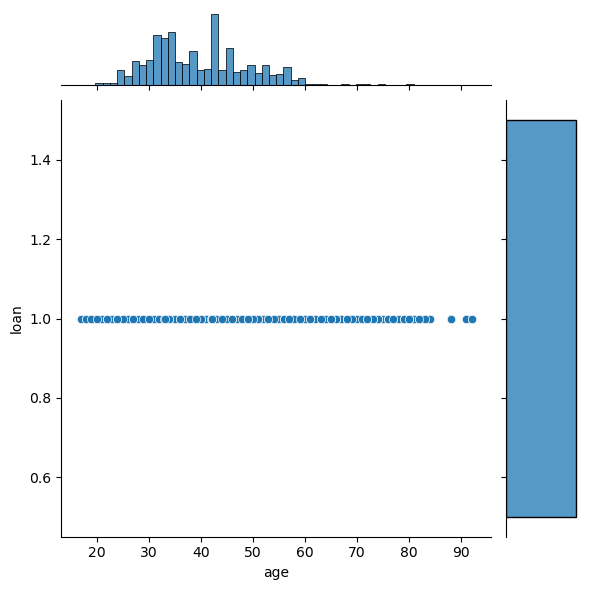

In [76]:
df_filtrado_l = df_unido_c[df_unido_c['loan'] == 1]
sns.jointplot(data=df_filtrado_l, x='age', y='loan')

# Calcular la media por grupo
medias_edad_mas_hipo = df_filtrado_l.groupby('age')['loan'].sum()

print(medias_edad_mas_hipo)

Visualizar en graficos y datos que estado laboral es que mas pide un segundo prestamo


empl_stat
employed      5920.0
other           59.0
retired        249.0
student        146.0
unemployed     158.0
Name: loan, dtype: float64


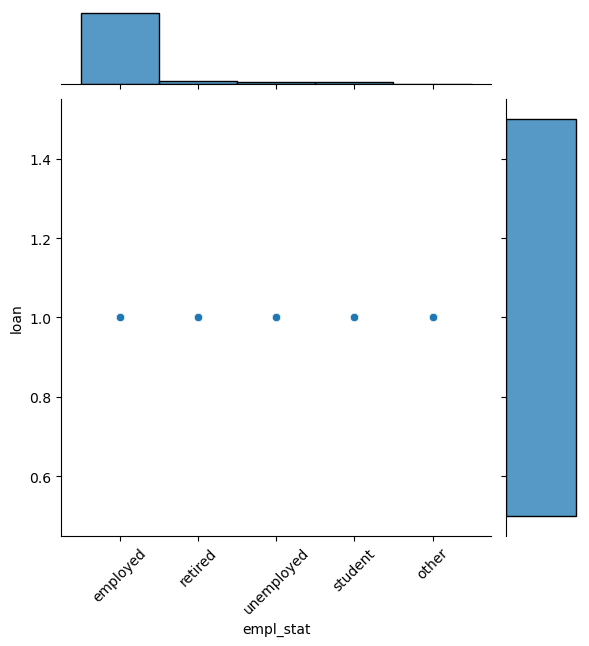

In [77]:
df_filtrado_l = df_unido_c[df_unido_c['loan'] == 1]
sns.jointplot(data=df_filtrado_l, x='empl_stat', y='loan')
plt.xticks(rotation=45)

# Calcular la media por grupo
sta_empl_mas_hipo = df_filtrado_l.groupby('empl_stat')['loan'].sum()

print(sta_empl_mas_hipo)

Comprobar si el tener hijos y un segundo prestamos tien relacion

Sonhome
0.0    325.0
1.0    671.0
2.0    995.0
3.0    671.0
4.0    347.0
Name: loan, dtype: float64


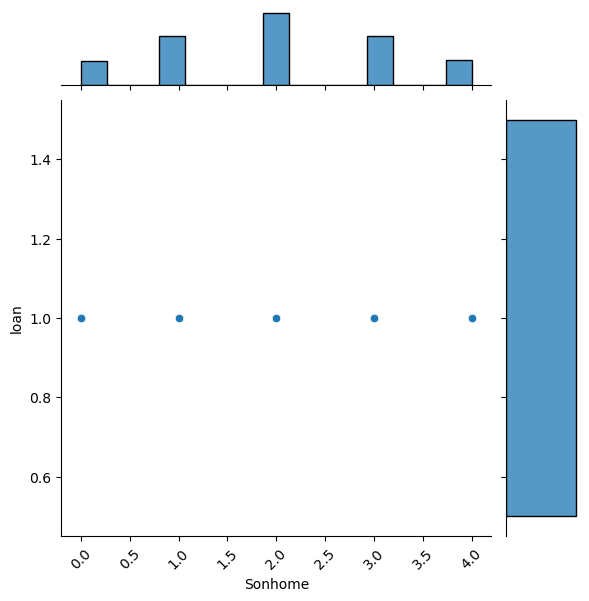

In [78]:
df_filtrado_l = df_unido_c[df_unido_c['loan'] == 1]
sns.jointplot(data=df_filtrado_l, x='Sonhome', y='loan')
plt.xticks(rotation=45)

# Calcular la media por grupo
N_hijos_mas_hipo = df_filtrado_l.groupby('Sonhome')['loan'].sum()

print(N_hijos_mas_hipo)

Comprobar cualles son los niveles de educacion son los que mas segundo prestamo piden mas


educa_level
degree                 2022.0
non.studies               3.0
other                   250.0
professional.course     845.0
school                 3412.0
Name: loan, dtype: float64


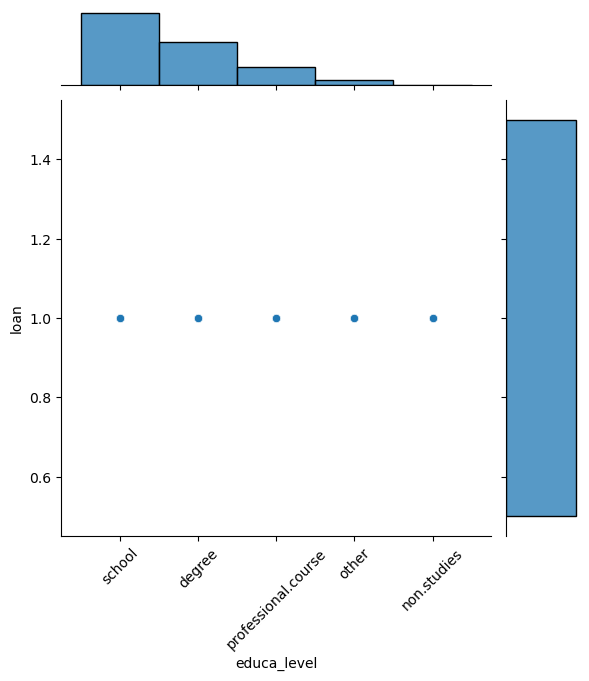

In [79]:
df_filtrado_l = df_unido_c[df_unido_c['loan'] == 1]
sns.jointplot(data=df_filtrado_l, x='educa_level', y='loan')
plt.xticks(rotation=45)

# Calcular la media por grupo
nivel_educa_mas_hipo = df_filtrado_l.groupby('educa_level')['loan'].sum()

print(nivel_educa_mas_hipo)

## Repetimos el proceso pero con hipotecas

age
17.0     3.0
18.0    18.0
19.0    28.0
20.0    33.0
21.0    45.0
        ... 
88.0    15.0
89.0     1.0
91.0     1.0
92.0     1.0
98.0     2.0
Name: housing, Length: 78, dtype: float64


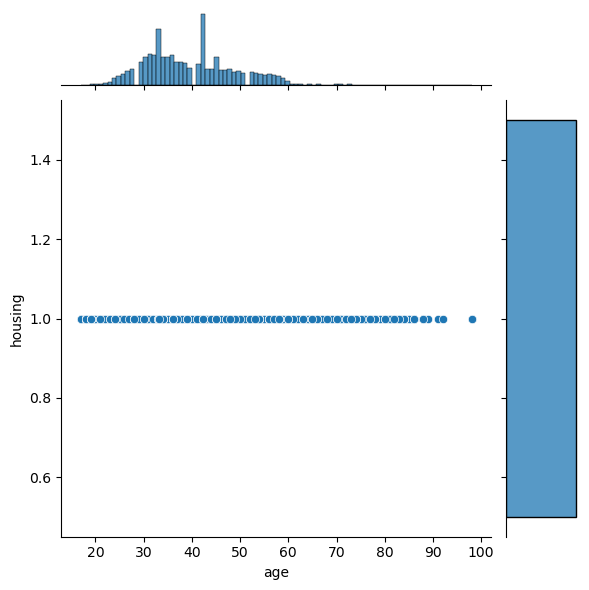

In [80]:
df_filtrado_h = df_unido_c[df_unido_c['housing'] == 1]
sns.jointplot(data=df_filtrado_h, x='age', y='housing')

# Calcular la media por grupo
medias_edad_hipo = df_filtrado_h.groupby('age')['housing'].sum()

print(medias_edad_hipo)

Sonhome
0.0    1103.0
1.0    2086.0
2.0    3188.0
3.0    2150.0
4.0    1071.0
Name: housing, dtype: float64


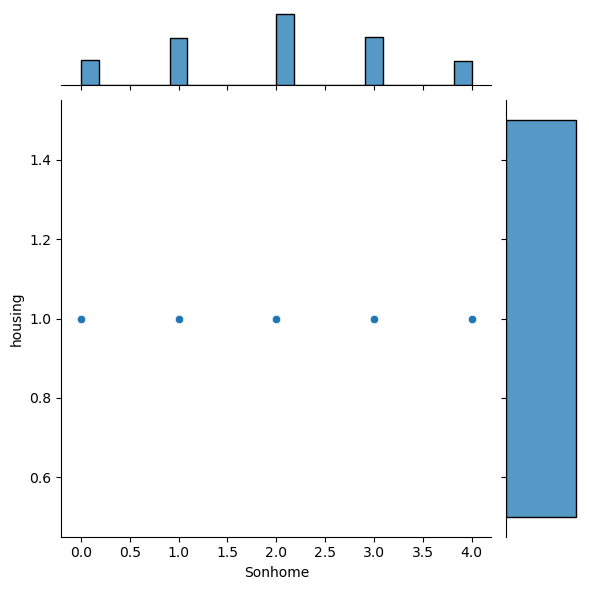

In [81]:
df_filtrado_h = df_unido_c[df_unido_c['housing'] == 1]
sns.jointplot(data=df_filtrado_h, x='Sonhome', y='housing')

# Calcular la media por grupo
N_hijos_hipo = df_filtrado_h.groupby('Sonhome')['housing'].sum()

print(N_hijos_hipo)

empl_stat
employed      20320.0
other           178.0
retired         933.0
student         483.0
unemployed      584.0
Name: housing, dtype: float64


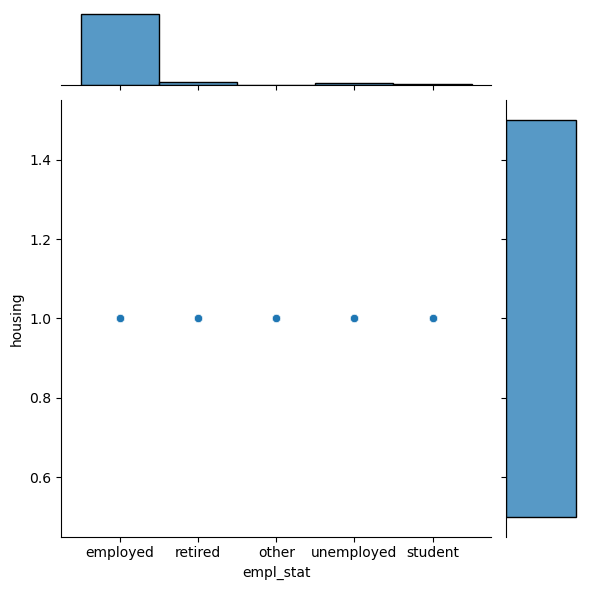

In [82]:
df_filtrado_h = df_unido_c[df_unido_c['housing'] == 1]
sns.jointplot(data=df_filtrado_h, x='empl_stat', y='housing')

# Calcular la media por grupo
sta_empl_hipo = df_filtrado_h.groupby('empl_stat')['housing'].sum()

print(sta_empl_hipo)

educa_level
degree                  6796.0
non.studies               10.0
other                    913.0
professional.course     2963.0
school                 11816.0
Name: housing, dtype: float64


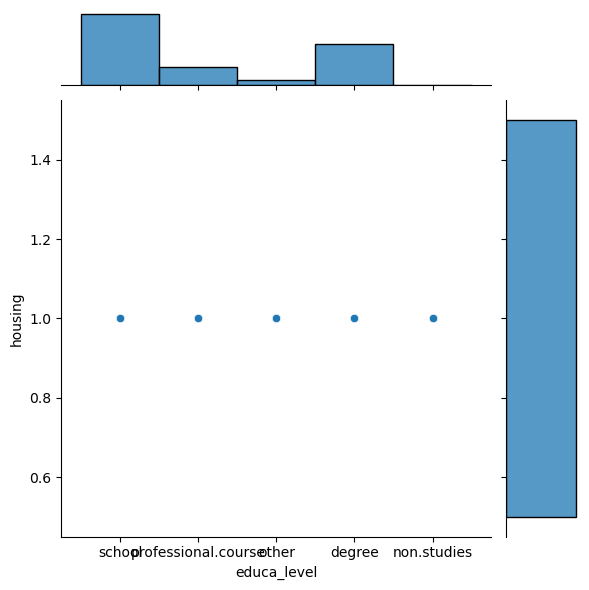

In [83]:
df_filtrado_h = df_unido_c[df_unido_c['housing'] == 1]
sns.jointplot(data=df_filtrado_h, x='educa_level', y='housing')

# Calcular la media por grupo
nivel_educa_hipo = df_filtrado_h.groupby('educa_level')['housing'].sum()

print(nivel_educa_hipo)

age
42.24    1.0
48.00    2.0
Name: default, dtype: float64


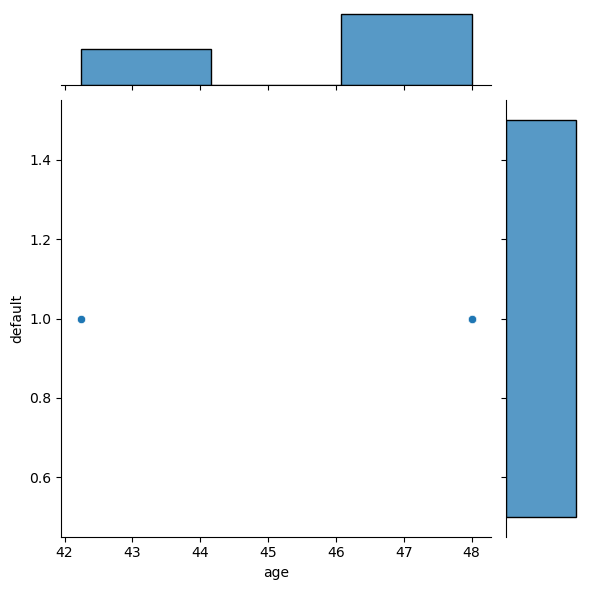

In [84]:
df_filtrado_I = df_unido_c[df_unido_c['default'] == 1]
sns.jointplot(data=df_filtrado_I, x='age', y='default')

# Calcular la media por grupo
edad_impago = df_filtrado_I.groupby('age')['default'].sum()

print(edad_impago)

empl_stat
employed      2.0
unemployed    1.0
Name: default, dtype: float64


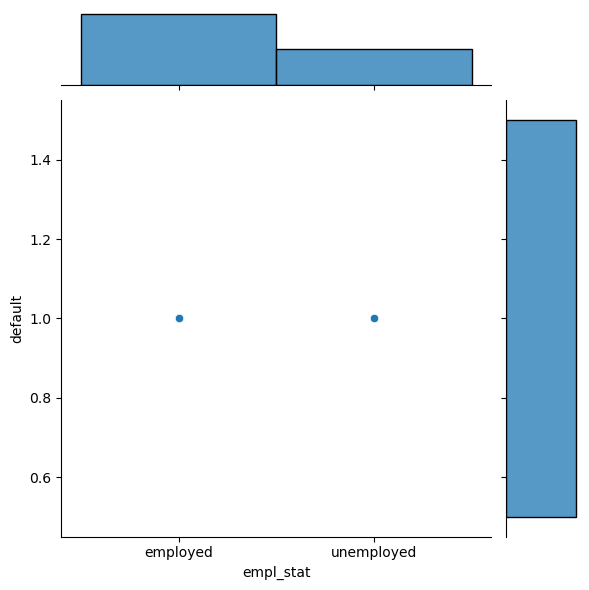

In [85]:
df_filtrado_I = df_unido_c[df_unido_c['default'] == 1]
sns.jointplot(data=df_filtrado_I, x='empl_stat', y='default')

# Calcular la media por grupo
statu_empleo_impago = df_filtrado_I.groupby('empl_stat')['default'].sum()

print(statu_empleo_impago)

educa_level
professional.course    2.0
school                 1.0
Name: default, dtype: float64


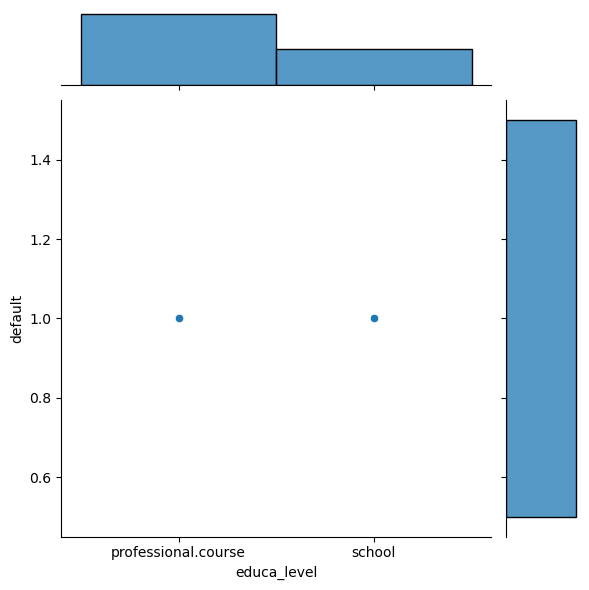

In [86]:
df_filtrado_I = df_unido_c[df_unido_c['default'] == 1]
sns.jointplot(data=df_filtrado_I, x='educa_level', y='default')

# Calcular la media por grupo
nivel_estu_impago = df_filtrado_I.groupby('educa_level')['default'].sum()

print(nivel_estu_impago)

Series([], Name: default, dtype: float64)


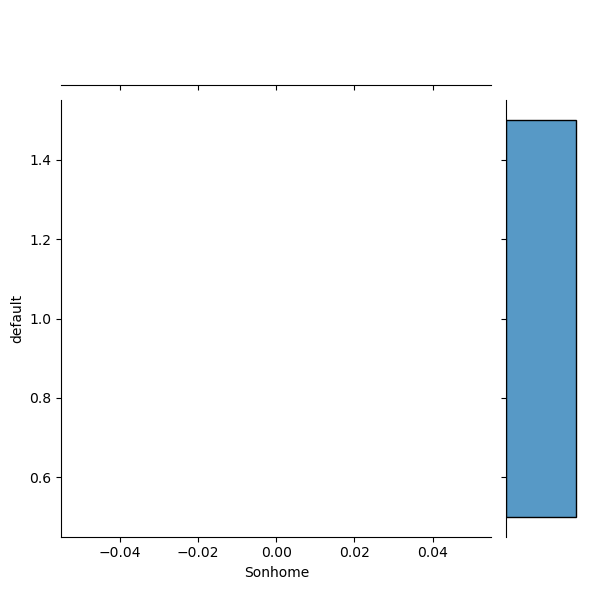

In [87]:
df_filtrado_I = df_unido_c[df_unido_c['default'] == 1]
sns.jointplot(data=df_filtrado_I, x='Sonhome', y='default')

# Calcular la media por grupo
N_hijo_impago = df_filtrado_I.groupby('Sonhome')['default'].sum()

print(N_hijo_impago)